In [1]:
import matplotlib.pyplot as plt
plt.ion()

In [2]:
from L2_example import second_level

run2 = second_level(phase='fear_conditioning')

In [3]:
#set contrast of interest
run2.contrast = 'CSplus___CSmin'

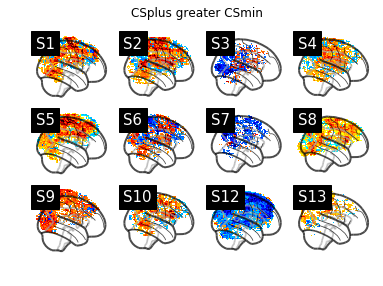

In [4]:
#find and take a look at the first levels
run2.fetch_first_levels(phase='fear_conditioning',contrast=run2.contrast)

run2.display_first_levels(contrast=run2.contrast)

In [5]:
#get the design matrix set up
import pandas as pd

run2.design_matrix = pd.DataFrame([1] * len(run2.first_levels), columns=['intercept'])
run2.design_matrix

,intercept
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [6]:
#init & fit
from nistats.second_level_model import SecondLevelModel

run2.glm = SecondLevelModel(smoothing_fwhm=8)
run2.glm = run2.glm.fit(run2.first_levels, design_matrix = run2.design_matrix)

In [7]:
#generate stats
run2.z_map = run2.glm.compute_contrast(output_type='z_score')

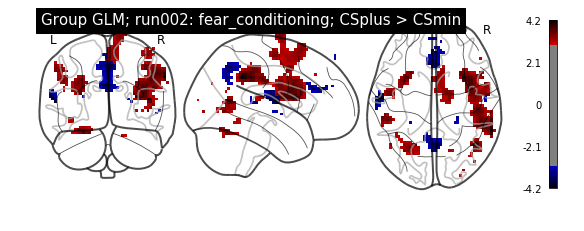

In [8]:
#display the results
from nilearn.plotting import plot_glass_brain

plot_glass_brain(run2.z_map, threshold=3, colorbar=True, plot_abs=False,
                display_mode='ortho', title='Group GLM; run002: fear_conditioning; CSplus > CSmin')